In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import re
stopwords = nltk.corpus.stopwords.words('english')
# print(string.punctuation) -> '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# stopwords.words("english")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270324527442495, 'language': ''}

In [3]:
# Read in the raw text
rawData = open("spam.csv",encoding='Windows-1252').read()

# Print the raw data
rawData[0:700]

'ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\nham,Ok lar... Joking wif u oni...,,,\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\nham,U dun say so early hor... U c already then say...,,,\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,\nham,Even my brother is not like to speak with me. They treat me like aids patent.,,,\nham,As'

In [4]:
data = pd.read_csv('spam.csv',encoding='Windows-1252', 
                   usecols=[0,1], names=['tag','text'], header=None)
print(data['text'])
print('-----------------------------------------------------------')
print(data.head())

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object
-----------------------------------------------------------
    tag                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so earl

In [5]:
print('data.shape:',data.shape)
print('type(data)', type(data))

data.shape: (5572, 2)
type(data) <class 'pandas.core.frame.DataFrame'>


In [6]:
labelList = []
textList = []
print(data['tag'])
for i in data['tag']:
    labelList.append(i)
for j in data['text']:
    textList.append(j)

print(labelList[0:5])
print(textList[0:5])

print(len(labelList))
print(len(textList))
print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: tag, Length: 5572, dtype: object
['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]
5572
5572
Input data has 5572 rows and 2 columns


In [7]:
def remove_punct(text):
    text_only = ''.join([char for char in text if char not in string.punctuation])
    return text_only

data['text_nopunct'] = data['text'].apply(lambda x: remove_punct(x))
print(data['text_nopunct'])

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                  Will Ì b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: text_nopunct, Length: 5572, dtype: object


In [8]:
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens
data['text_tokenized'] = data['text_nopunct'].apply(lambda x:tokenize(x.lower()))
data.head()

,tag,text,text_nopunct,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [9]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
data['text_nonstop'] = data['text_tokenized'].apply(lambda x: remove_stopwords(x))
data['text_nonstop']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å, 750, p...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: text_nonstop, Length: 5572, dtype: object

In [10]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
data['text_stemmed'] = data['text_nonstop'].apply(lambda x:stemming(x))
data.head()

,tag,text,text_nopunct,text_tokenized,text_nonstop,text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [11]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text
data['text_lemmatized'] = data['text_nonstop'].apply(lambda x:lemmatizing(x))
data.head()

,tag,text,text_nopunct,text_tokenized,text_nonstop,text_stemmed,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


In [12]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2, 2), analyzer=clean_text)
X_count = ngram_vect.fit_transform(data['text'])
print(X_count.shape)
print(ngram_vect.get_feature_names())

(5572, 8059)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 8059)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [17]:
import string
data['text_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))

# print(data.head())

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['text'].apply(lambda x:count_punct(x))

print(data.head())

    tag                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                        text_nopunct  \
0  Go until jurong point crazy Available only in ...   
1                            Ok lar Joking wif u oni   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3        U dun say so early hor U c already then say   
4  Nah I dont think he goes to usf he lives aroun...   

                                      text_tokenized  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i

(array([0.        , 0.        , 0.00026104, 0.00026104, 0.00026104,
        0.00104418, 0.00078313, 0.0023494 , 0.00130522, 0.00026104,
        0.00130522, 0.00365462, 0.00156627, 0.00156627, 0.00182731,
        0.00182731, 0.00391566, 0.00548193, 0.00417671, 0.00626506,
        0.00574297, 0.0135743 , 0.01566265, 0.02192771, 0.02714859,
        0.04411647, 0.01905622, 0.00600402, 0.00208835, 0.00078313,
        0.00026104, 0.        , 0.        , 0.00026104, 0.        ,
        0.        , 0.        , 0.00026104, 0.        ]),
 array([  0.        ,   5.12820513,  10.25641026,  15.38461538,
         20.51282051,  25.64102564,  30.76923077,  35.8974359 ,
         41.02564103,  46.15384615,  51.28205128,  56.41025641,
         61.53846154,  66.66666667,  71.79487179,  76.92307692,
         82.05128205,  87.17948718,  92.30769231,  97.43589744,
        102.56410256, 107.69230769, 112.82051282, 117.94871795,
        123.07692308, 128.20512821, 133.33333333, 138.46153846,
        143.589743

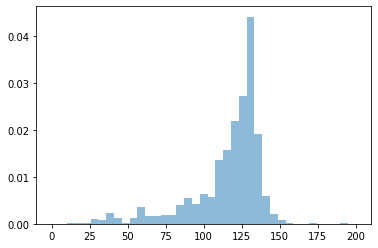

In [19]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 200, 40)

plt.hist(data[data['tag']=='spam']['text_len'], bins, alpha=0.5, density=True, label="spam")


(array([0.00127129, 0.00184543, 0.00262461, 0.0155836 , 0.02066877,
        0.01968454, 0.01759306, 0.01742902, 0.01119558, 0.00885804,
        0.00820189, 0.00803785, 0.00676656, 0.00586435, 0.00504416,
        0.00422397, 0.00344479, 0.00377287, 0.00360883, 0.00287066,
        0.0034858 , 0.00311672, 0.0034858 , 0.00426498, 0.00397792,
        0.00221451, 0.00168139, 0.00049211, 0.00106625, 0.00032808,
        0.00032808, 0.00049211, 0.00024606, 0.00016404, 0.00024606,
        0.00012303, 0.00020505, 0.00028707, 0.00020505]),
 array([  0.        ,   5.12820513,  10.25641026,  15.38461538,
         20.51282051,  25.64102564,  30.76923077,  35.8974359 ,
         41.02564103,  46.15384615,  51.28205128,  56.41025641,
         61.53846154,  66.66666667,  71.79487179,  76.92307692,
         82.05128205,  87.17948718,  92.30769231,  97.43589744,
        102.56410256, 107.69230769, 112.82051282, 117.94871795,
        123.07692308, 128.20512821, 133.33333333, 138.46153846,
        143.589743

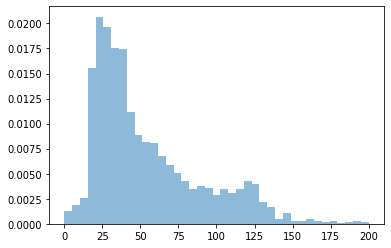

In [20]:
plt.hist(data[data['tag']=='ham']['text_len'], bins, alpha=0.5, density=True, label="ham")


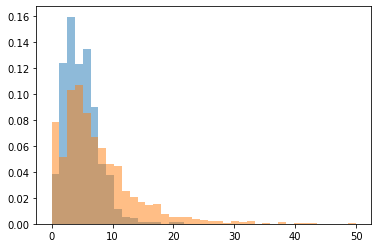

In [21]:
bins = np.linspace(0, 50, 40)
plt.hist(data[data['tag']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['tag']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.show()

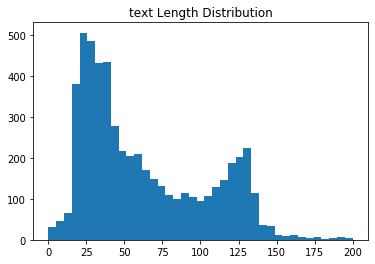

In [22]:
bins = np.linspace(0, 200, 40)

plt.hist(data["text_len"], bins)
plt.title("text Length Distribution")
plt.show()

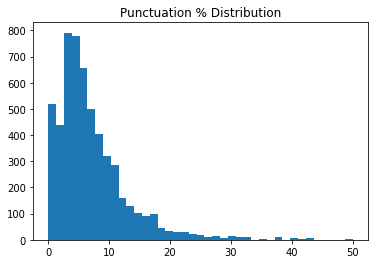

In [23]:
bins = np.linspace(0, 50, 40)

plt.hist(data["punct%"], bins)
plt.title("Punctuation % Distribution")
plt.show()

In [24]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])
X_tfidf_feat = pd.concat([data['text_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [25]:
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['text'])
X_count_feat = pd.concat([data['text_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,text_len,punct%,0,1,2,3,4,5,6,7,...,8049,8050,8051,8052,8053,8054,8055,8056,8057,8058
0,92,9.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,15.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param = {'n_estimators':[10, 150, 300],
        'max_depth':[30, 60, 90, None]}
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['tag'])
tfidf_result = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

In [27]:
tfidf_result[["mean_fit_time", "mean_score_time", "mean_test_score", "param_max_depth", "param_n_estimators"]]


,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators
7,22.294656,0.195893,0.975054,90,150
10,21.240733,0.185018,0.975054,None,150
11,36.386473,0.202264,0.974515,None,300
8,39.941442,0.299505,0.974336,90,300
5,37.948630,0.259788,0.973259,60,300


In [28]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['tag'])
count_result = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [29]:
count_result[["mean_fit_time", "mean_score_time", "mean_test_score", "param_max_depth", "param_n_estimators"]]

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators
7,20.395858,0.197237,0.974695,90,150
8,42.405482,0.385777,0.974336,90,300
11,42.669505,0.247983,0.974156,None,300
10,24.804288,0.213361,0.973439,None,150
3,2.028687,0.093138,0.972900,60,10


In [30]:
X_features = pd.concat([data['text_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,text_len,punct%,0,1,2,3,4,5,6,7,...,8049,8050,8051,8052,8053,8054,8055,8056,8057,8058
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_features, data["tag"], test_size = 0.2)

print(X_train, X_test, y_train, y_test)


      text_len  punct%    0    1    2    3    4    5    6    7  ...  8049  \
4570        31     3.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2535       127     3.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3364        19    10.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4288        29    13.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3694        57    12.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
...        ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
703         87     6.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
921         45     4.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
962         77    10.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1729        27     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
221        132     3.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

      8050  8051  8052  8053  8054  8055  8056  8057  8058  
4570   0.0   0

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators = est, max_depth = max_depth, learning_rate = lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = "spam", average = "binary")
    print("Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(est,
                                                                                              max_depth,
                                                                                              lr,
                                                                                              round(precision, 3),
                                                                                              round(recall, 3),
                                                                                              round((y_pred == y_test).sum() / len(y_pred), 3)))

In [33]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)


Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.075 / Accuracy: 0.866
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.967 / Recall: 0.739 / Accuracy: 0.959
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.892 / Recall: 0.77 / Accuracy: 0.953
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.856
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.955 / Recall: 0.795 / Accuracy: 0.965
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.921 / Recall: 0.795 / Accuracy: 0.961
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.006 / Accuracy: 0.857
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.964 / Recall: 0.82 / Accuracy: 0.97
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.899 / Recall: 0.776 / Accuracy: 0.955
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.856
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.964 / Recall: 0.82 / Accuracy: 0.97
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.933 / Recall: 0.776 / Accuracy: 0

In [34]:
gb = GradientBoostingClassifier()

param = {
    "n_estimators": [100, 150],
    "max_depth": [7, 11, 15],
    "learning_rate": [0.1]
}
gs = GridSearchCV(gb, param, cv = 5, n_jobs = -1)
cv_fit = gs.fit(X_tfidf_feat, data["tag"])
tfidf_df = pd.DataFrame(cv_fit.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]
tfidf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,304.647778,3.373271,0.198679,0.016498,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.973094,0.980269,0.973070,0.973070,0.969479,0.973798,0.003524,1
3,484.313969,1.560113,0.204659,0.012467,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.971300,0.982960,0.973070,0.969479,0.970377,0.973439,0.004908,2
0,206.283940,0.982645,0.179124,0.010790,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.969507,0.977578,0.973070,0.972172,0.969479,0.972362,0.002974,3
5,546.682341,13.042023,0.122269,0.022978,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.967713,0.980269,0.973070,0.969479,0.967684,0.971644,0.004739,4
2,331.272809,2.030139,0.193885,0.009001,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.970404,0.977578,0.972172,0.967684,0.968582,0.971285,0.003506,5


In [35]:
gb = GradientBoostingClassifier()

param = {
    "n_estimators": [100, 150],
    "max_depth": [7, 11, 15],
    "learning_rate": [0.1]
}
gs = GridSearchCV(gb, param, cv = 5, n_jobs = -1)
cv_fit = gs.fit(X_count_feat, data["tag"])
count_df = pd.DataFrame(cv_fit.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]
count_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,555.753488,10.643891,0.286834,0.054167,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.971300,0.978475,0.976661,0.970377,0.972172,0.973798,0.003183,1
4,502.347069,24.662078,0.218616,0.018673,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.970404,0.979372,0.974865,0.969479,0.973070,0.973439,0.003529,2
5,600.202637,21.245340,0.148405,0.027388,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.971300,0.978475,0.974865,0.970377,0.970377,0.973080,0.003165,3
2,349.034996,13.660419,0.211255,0.026230,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.969507,0.978475,0.976661,0.967684,0.971275,0.972721,0.004158,4
0,207.811919,1.135633,0.199769,0.038171,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.970404,0.978475,0.971275,0.970377,0.971275,0.972362,0.003083,5
